In [19]:
library(ggplot2)
library(gridExtra)
df <- read.csv("scatter_histogram.csv")

In [20]:
g_scatter <- ggplot(df) + 
       geom_point(aes(x,y),colour="dodgerblue3") +
       scale_x_continuous(limits=c(-4,4),breaks = -4:4) +
       scale_y_continuous(limits=c(-4,4),breaks = -4:4)

In [23]:
g_hist_x <- ggplot(df) + 
              geom_histogram(aes(x),fill="dodgerblue4", binwidth = 0.25,boundary=-4) + 
              scale_x_continuous(limits=c(-4,4),breaks = -4:4) + 
              theme(axis.text.x=element_blank()) + xlab("") + ylab("")

In [24]:
g_hist_y <- ggplot(df) + 
              geom_histogram(aes(y),fill="dodgerblue4",binwidth=0.25,boundary=-4) + 
              scale_x_continuous(limits=c(-4,4),breaks = -4:4) + 
              coord_flip() +
              theme(axis.text.y=element_blank()) + xlab("") + ylab("")

In [25]:
glist <- list(g_scatter,g_hist_y,g_hist_x)
groblist <- lapply(glist, ggplotGrob)

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

In [26]:
widths <- do.call(grid::unit.pmax, lapply(groblist, function(x) x$widths))
heights <- do.call(grid::unit.pmax, lapply(groblist, function(x) x$heights))
for(i in 1:length(groblist)) {
    groblist[[i]]$widths <- widths
    groblist[[i]]$heights <- heights
}
                                          
groblist[[3]]$heights[8:12] <- grid::unit(0,"cm")
groblist[[2]]$widths[1:4] <- grid::unit(0,"cm")

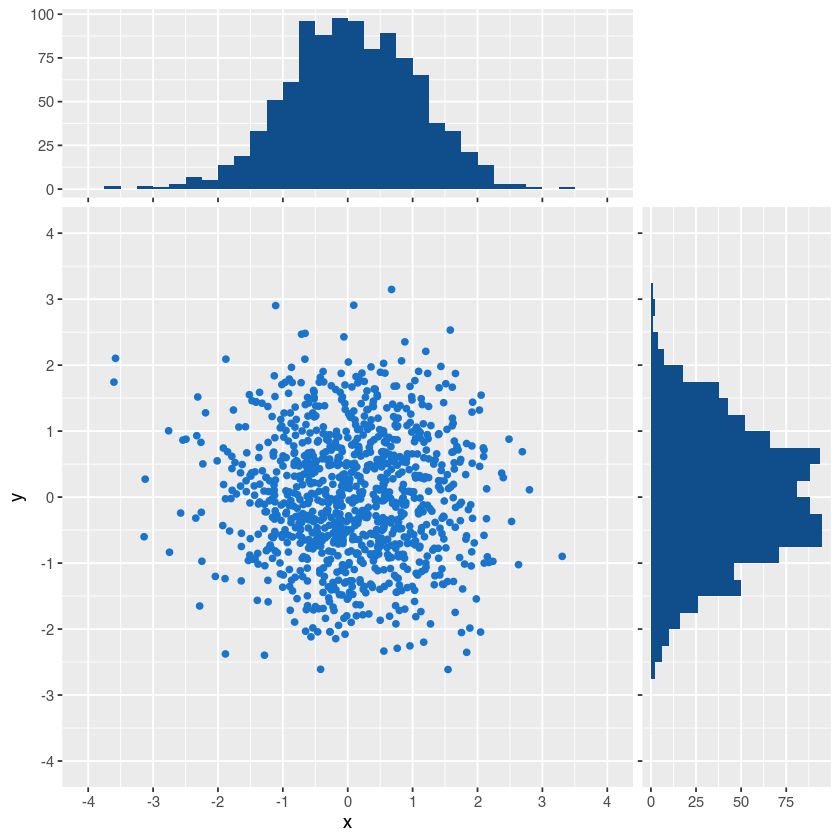

In [27]:
grid.arrange(grobs=groblist, 
             layout_matrix = matrix(c(3,1,NA,2),ncol=2),
             widths = c(0.65,0.2),
             heights = c(0.2,0.65),
             ncol=2,
             nrow=2)

In [10]:
groblist[[2]]$widths

[1] 0cm                      0cm                      0cm                     
[4] 0cm                      max(1null, 1null, 1null) max(0cm, 0cm, 0cm)      
[7] max(0cm, 0cm, 0cm)       max(0pt, 0pt, 0pt)       max(5.5pt, 5.5pt, 5.5pt)